In [1]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
# from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
# from resnet_FashionMnist import resnet_FashionMnist
# from vgg_FashionMnist import vgg
# from googlenet_FashionMnist import Googlenet
import sys

In [3]:
''' find the model path and the data path'''
# find the current path
currentpath = os.getcwd()
print('This path dir is: ', currentpath)

# find the parent dir of the parent dir
parentpath = os.path.dirname(os.path.dirname(currentpath))
print('The parent path dir is: ', parentpath)

################################################################################
# find the data path
datapath = os.path.join(parentpath, 'Data')
print('The data path dir is: ', datapath)
cifarpath_Data = os.path.join(datapath, 'CIFAR100')
fashionpath_Data = os.path.join(datapath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Data)
sys.path.append(fashionpath_Data)

# find the using model folder
model_path = os.path.join(cifarpath_Data, 'alexnet')
print('The training data are saved in: ', model_path)

# find the data path
sync_path = os.path.join(model_path, 'sync')
nosync_path = os.path.join(model_path, 'nosync')
print('The sync data are saved in: ', sync_path, '\n'
      'The nosync data are saved in: ', nosync_path)

################################################################################
# find the model path
modelpath = os.path.join(parentpath, 'Model')
print('The model path dir is: ', modelpath)
cifarpath_Model = os.path.join(modelpath, 'CIFAR100')
fashionpath_Model = os.path.join(modelpath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Model)
sys.path.append(fashionpath_Model)

This path dir is:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Analysis/universal
The parent path dir is:  /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path dir is:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data
The training data are saved in:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet
The sync data are saved in:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/sync 
The nosync data are saved in:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/nosync
The model path dir is:  /Users/dtjgp/Learning/GreenAI/Cloud/4090/Model


In [4]:
from AlexNet_C import alexnet_c
alexnet_cifar = alexnet_c()

In [5]:
with torch.cuda.device(0):
    net = alexnet_cifar
    macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

RuntimeError: PyTorch was compiled without CUDA support

In [7]:
# find out the folders that in the sync_path
sync_folders = os.listdir(sync_path)
print('The folders in the sync_path are: ', sync_folders)   

# nosync_folders = os.listdir(nosync_path)
# print('The folders in the nosync_path are: ', nosync_folders)

The folders in the sync_path are:  ['round_10', 'round_7', 'round_9', 'round_8', 'round_6', 'round_1', 'round_4', 'round_3', 'round_2', 'round_5']


In [9]:
sync_subfolder = [os.path.join(sync_path, round) for round in sync_folders]
# nosync_subfolder = [os.path.join(nosync_path, round) for round in nosync_folders]

# print('The sync subfolders are: ', sync_subfolder, '\n', 'The nosync subfolders are: ', nosync_subfolder)

In [10]:
for i in sync_subfolder:
    filesi = os.listdir(i)
    print(f'The files in the subfolder{i} are: ', filesi)

print('*'*200)

# for i in nosync_subfolder:
#     filesi = os.listdir(i)
#     print(f'The files in the subfolder{i} are: ', filesi)

The files in the subfolder/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/sync/round_10 are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/sync/round_7 are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/sync/round_9 are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLoss.npy', 'Energy_AllEpochs.npy']
The files in the subfolder/Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/CIFAR100/alexnet/sync/round_8 are:  ['TrainLoss.npy', 'Time_AllEpochs.npy', 'TestAcc.npy', 'TrainTime.npy', 'TimeEpoch.npy', 'TrainAcc.npy', 'TTrainAccLo

In [11]:
num = len(sync_folders)
Round = num
Epoch = num
print('The number of rounds is: ', num, '\n', 'The number of epochs is: ', num)

The number of rounds is:  10 
 The number of epochs is:  10


In [12]:
# the RoundTinfo contains the time info of each round and each epoch
# in each epoch, it contains 1. time to device, 2. time forward, 3. time cal loss, 
#                            4. time backward, 5. time optimization and 6. time cal acc
RoundTinfo_sync = np.zeros((Round,Epoch,6))
# RoundTinfo_nosync = np.zeros((Round,Epoch,6))

# the Energy contains the energy info of each round and each epoch
Energy_sync = np.zeros((Round,Epoch,1), dtype=object)
# Energy_nosync = np.zeros((Round,Epoch,1), dtype=object)

# the TrainTime contains the training time info of each round and each epoch
TrainTime_sync = np.zeros((Round,Epoch,1))
# TrainTime_nosync = np.zeros((Round,Epoch,1))

# the EpochTime contains the epoch time info of each round and each epoch
EpochTime_sync = np.zeros((Round,Epoch,1))
# EpochTime_nosync = np.zeros((Round,Epoch,1))

# the TrainAcc contains the training accuracy info of each round and each epoch
TrainAcc_sync = np.zeros((Round,Epoch,1))
# TrainAcc_nosync = np.zeros((Round,Epoch,1))

# the TrainLoss contains the training loss info of each round and each epoch
TrainLoss_sync = np.zeros((Round,Epoch,1))
# TrainLoss_nosync = np.zeros((Round,Epoch,1))

# the TestAcc contains the testing accuracy info of each round and each epoch
TestAcc_sync = np.zeros((Round,Epoch,1))
# TestAcc_nosync = np.zeros((Round,Epoch,1))

In [13]:
for round in range(len(sync_subfolder)):
    pathi = sync_subfolder[round]
    RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
    TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

    RoundTinfo_sync[round] = RoundTinfoi
    Energy_sync[round] = Energyi
    TrainTime_sync[round] = TrainTimei
    EpochTime_sync[round] = EpochTimei
    TrainLoss_sync[round] = TrainLossi
    TrainAcc_sync[round] = TrainAcci
    TestAcc_sync[round] = TestAcci

# for round in range(len(nosync_subfolder)):
#     pathi = nosync_subfolder[round]
#     RoundTinfoi = np.load(os.path.join(pathi, 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
#     Energyi = np.load(os.path.join(pathi, 'Energy_AllEpochs.npy'), allow_pickle=True)
#     TrainTimei = np.load(os.path.join(pathi, 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
#     EpochTimei = np.load(os.path.join(pathi, 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
#     TrainLossi = np.load(os.path.join(pathi, 'TrainLoss.npy'), allow_pickle=True)
#     TrainAcci = np.load(os.path.join(pathi, 'TrainAcc.npy'), allow_pickle=True)
#     TestAcci = np.load(os.path.join(pathi, 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)

#     RoundTinfo_nosync[round] = RoundTinfoi
#     Energy_nosync[round] = Energyi
#     TrainTime_nosync[round] = TrainTimei
#     EpochTime_nosync[round] = EpochTimei
#     TrainLoss_nosync[round] = TrainLossi
#     TrainAcc_nosync[round] = TrainAcci
#     TestAcc_nosync[round] = TestAcci

#### RoundTinfo

In [12]:
print(RoundTinfo_sync.shape, RoundTinfo_nosync.shape)

(10, 10, 6) (10, 10, 6)


对10个epoch的数据要进行平均

In [14]:
# calculate the avg time of each round
RoundTime_syncavg = np.average(RoundTinfo_sync, axis=0)
print('The avg time of each epoch in sync is: ', RoundTime_syncavg, '\n', 'The shape is: ', RoundTime_syncavg.shape)

# RoundTime_nosyncavg = np.average(RoundTinfo_nosync, axis=0)
# print('The avg time of each epoch in nosync is: ', RoundTime_nosyncavg, '\n', 'The shape is: ', RoundTime_nosyncavg.shape)

The avg time of each epoch in sync is:  [[6.9993427  2.17631943 0.06886132 4.43363225 0.36246471 5.45470862]
 [6.85266154 2.14344649 0.06406913 4.40193517 0.35937071 5.41506698]
 [7.20292699 2.15310931 0.06683936 4.42521315 0.36473188 5.49946189]
 [7.06446669 2.15182631 0.06521695 4.42753017 0.36140921 5.38628726]
 [7.21675212 2.15425434 0.0662132  4.43189375 0.36288378 5.50984728]
 [7.23765509 2.16296396 0.0662818  4.45164912 0.36408429 5.60130043]
 [6.98790636 2.14787796 0.06501207 4.42397561 0.36145904 5.44726908]
 [7.48357525 2.16415572 0.06785338 4.45382423 0.36784203 5.56692264]
 [7.19663815 2.15703995 0.06541395 4.44662719 0.36427326 5.52754498]
 [7.14957595 2.15416708 0.0655339  4.42278235 0.36255848 5.42834079]] 
 The shape is:  (10, 6)


In [15]:
# sync data
print('In sync data')
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', RoundTime_syncavg[:,0].T, '\n',
      'The Forward time of all epoch: \n', RoundTime_syncavg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', RoundTime_syncavg[:,2].T, '\n',
      'The Backward time of all epoch: \n', RoundTime_syncavg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', RoundTime_syncavg[:,4].T, '\n',
      'The Test time of all epoch: \n', RoundTime_syncavg[:,5].T)

# nosync data
# print('In nosync data')
# print('For each epoch, the time of each layer is: \n', 
#       'The Time to Device time of all epoch: \n', RoundTime_nosyncavg[:,0].T, '\n',
#       'The Forward time of all epoch: \n', RoundTime_nosyncavg[:,1].T, '\n',
#       'The Calculate Loss time of all epoch: \n', RoundTime_nosyncavg[:,2].T, '\n',
#       'The Backward time of all epoch: \n', RoundTime_nosyncavg[:,3].T, '\n',
#       'The Optimize time of all epoch: \n', RoundTime_nosyncavg[:,4].T, '\n',
#       'The Test time of all epoch: \n', RoundTime_nosyncavg[:,5].T)

In sync data
For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [6.9993427  6.85266154 7.20292699 7.06446669 7.21675212 7.23765509
 6.98790636 7.48357525 7.19663815 7.14957595] 
 The Forward time of all epoch: 
 [2.17631943 2.14344649 2.15310931 2.15182631 2.15425434 2.16296396
 2.14787796 2.16415572 2.15703995 2.15416708] 
 The Calculate Loss time of all epoch: 
 [0.06886132 0.06406913 0.06683936 0.06521695 0.0662132  0.0662818
 0.06501207 0.06785338 0.06541395 0.0655339 ] 
 The Backward time of all epoch: 
 [4.43363225 4.40193517 4.42521315 4.42753017 4.43189375 4.45164912
 4.42397561 4.45382423 4.44662719 4.42278235] 
 The Optimize time of all epoch: 
 [0.36246471 0.35937071 0.36473188 0.36140921 0.36288378 0.36408429
 0.36145904 0.36784203 0.36427326 0.36255848] 
 The Test time of all epoch: 
 [5.45470862 5.41506698 5.49946189 5.38628726 5.50984728 5.60130043
 5.44726908 5.56692264 5.52754498 5.42834079]


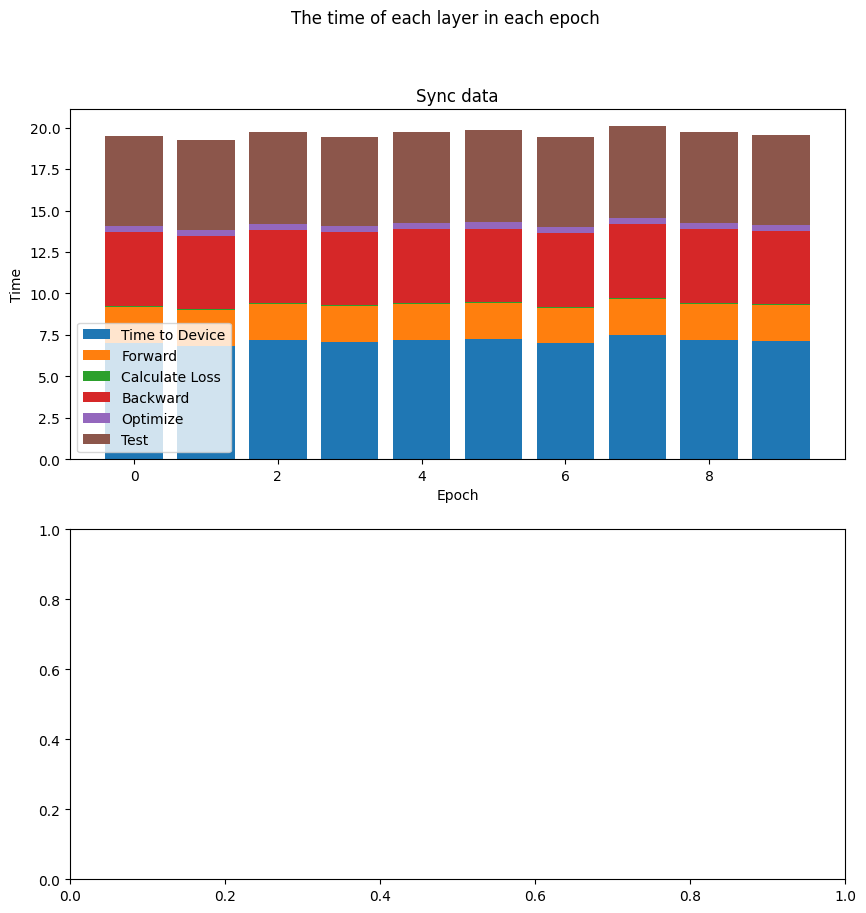

In [16]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
# 1 figure contains 2 subplots, sync data and nosync data
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The time of each layer in each epoch')
# sync data
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,0], label='Time to Device')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,1], bottom=RoundTime_syncavg[:,0], label='Forward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,2], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1], label='Calculate Loss')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,3], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2], label='Backward')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,4], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3], label='Optimize')
axs[0].bar(np.arange(Epoch), RoundTime_syncavg[:,5], bottom=RoundTime_syncavg[:,0]+RoundTime_syncavg[:,1]+RoundTime_syncavg[:,2]+RoundTime_syncavg[:,3]+RoundTime_syncavg[:,4], label='Test')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time')
axs[0].legend()

# # nosync data
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,0], label='Time to Device')
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,1], bottom=RoundTime_nosyncavg[:,0], label='Forward')
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,2], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1], label='Calculate Loss')
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,3], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2], label='Backward')
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,4], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3], label='Optimize')
# axs[1].bar(np.arange(Epoch), RoundTime_nosyncavg[:,5], bottom=RoundTime_nosyncavg[:,0]+RoundTime_nosyncavg[:,1]+RoundTime_nosyncavg[:,2]+RoundTime_nosyncavg[:,3]+RoundTime_nosyncavg[:,4], label='Test')
# axs[1].set_title('NoSync data')
# axs[1].set_xlabel('Epoch')
# axs[1].set_ylabel('Time')
# axs[1].legend()

# plt.show()

In [17]:
# sum the RoundTime_syncavg and RoundTime_nosyncavg in each epoch, to get each round running time
RoundTime_syncsum = np.sum(RoundTime_syncavg, axis=1)
print('The sum time of each epoch in sync is: ', RoundTime_syncsum, '\n', 'The shape is: ', RoundTime_syncsum.shape)

# RoundTime_nosyncsum = np.sum(RoundTime_nosyncavg, axis=1)
# print('The sum time of each epoch in nosync is: ', RoundTime_nosyncsum, '\n', 'The shape is: ', RoundTime_nosyncsum.shape)

The sum time of each epoch in sync is:  [19.49532905 19.23655002 19.71228259 19.45673659 19.74184449 19.88393469
 19.43350012 20.10417325 19.75753748 19.58295856] 
 The shape is:  (10,)


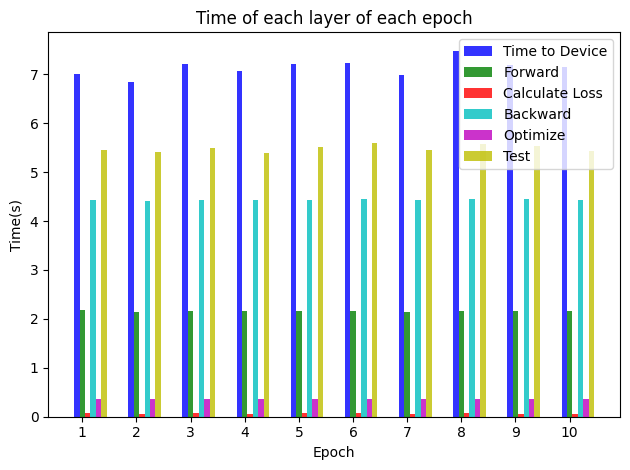

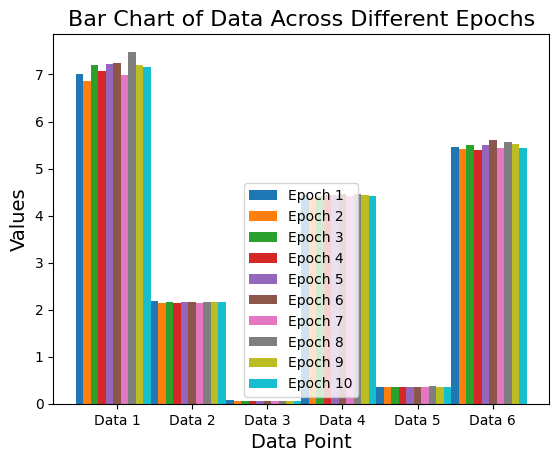

In [18]:
'''the data in sync is more convinced than the data in nosync, because in nosync data, 
each part in the model runs in parallel and in multi-threading, so each part are not start simultaneously, 
so the time of each part is not accurate.'''
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(num)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, RoundTime_syncavg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, RoundTime_syncavg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, RoundTime_syncavg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, RoundTime_syncavg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, RoundTime_syncavg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, RoundTime_syncavg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time(s)')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()


# Setting up the bar chart
fig, ax = plt.subplots()
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(RoundTime_syncavg.shape[1])
# Plotting each epoch's data
for i in range(num):
    ax.bar(index + i*bar_width, RoundTime_syncavg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * num / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(RoundTime_syncavg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

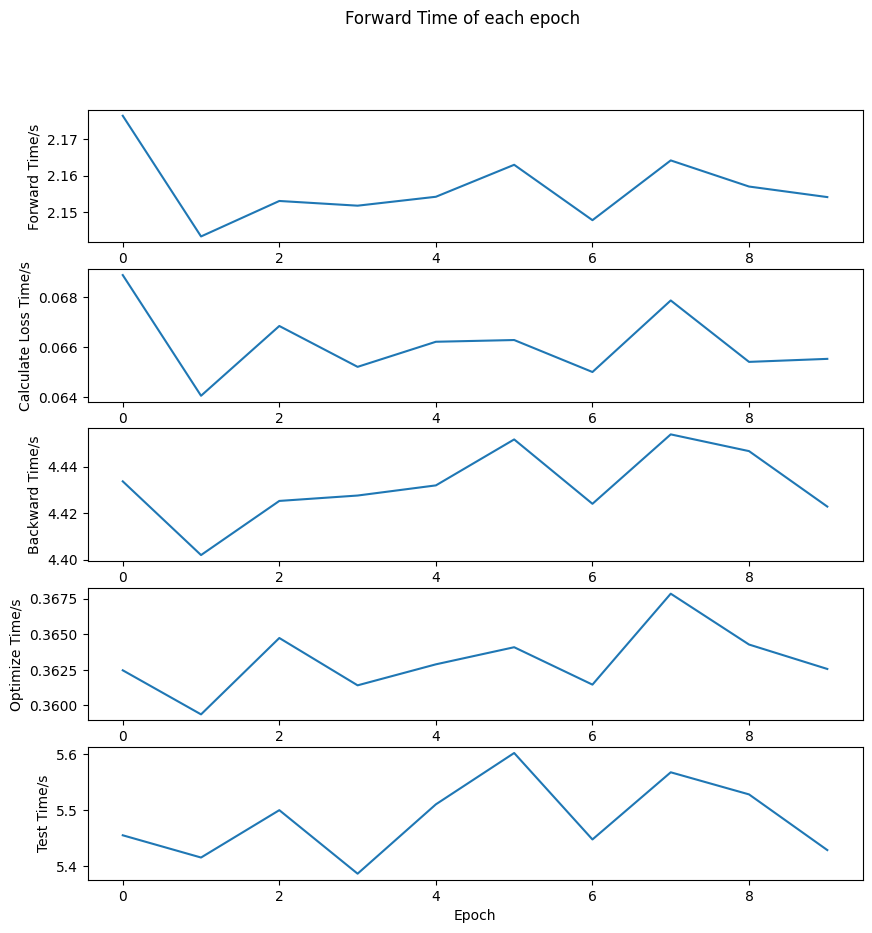

In [19]:
# plot all the data in 1 figure, and sevearl subplots
# plot the Forward time of each epoch using matplotlib with line in one figure
fig, axs = plt.subplots(5, 1, figsize=(10,10))

fig.suptitle('Forward Time of each epoch')
axs[0].plot(RoundTime_syncavg[:,1].T)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Forward Time/s')

axs[1].plot(RoundTime_syncavg[:,2].T)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Calculate Loss Time/s')

axs[2].plot(RoundTime_syncavg[:,3].T)
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Backward Time/s')  

axs[3].plot(RoundTime_syncavg[:,4].T)
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Optimize Time/s')

axs[4].plot(RoundTime_syncavg[:,5].T)
axs[4].set_xlabel('Epoch')
axs[4].set_ylabel('Test Time/s')

plt.show()

#### Energy 

In [20]:
def cal_time_energy(round, epoch, Energy_round):
    epochtime = np.zeros((round,epoch,1))
    energydata = np.zeros((round,epoch,1))
    for i in range(round):
        for j in range(epoch):
            roundepoch = Energy_round[i][j]
            lenthi = len(roundepoch[0])
            energyi = np.sum(roundepoch[0])
            epochtime[i][j] = lenthi
            energydata[i][j] = energyi
    return epochtime, energydata

In [21]:
# print(Energy_sync.shape, Energy_nosync.shape)

EpochTime_sync, EnergyData_sync = cal_time_energy(Round, Epoch, Energy_sync)
# EpochTime_nosync, EnergyData_nosync = cal_time_energy(Round, Epoch, Energy_nosync)

# print(EpochTime_sync.shape, EnergyData_sync.shape, EpochTime_nosync.shape, EnergyData_nosync.shape)

In [22]:
# sync data
# calculate the avg time of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).reshape(-1,)
# calculate the avg Energy of each round
EnergyData_syncavg = np.average(EnergyData_sync, axis=0).reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg.T, '\n', 'The shape is: ', EpochTime_syncavg.shape)
print('The avg Energy of each epoch in sync is: ', EnergyData_syncavg.T, '\n', 'The shape is: ', EnergyData_syncavg.shape)
# calculate each round the avged sum Time and Energy
EpochTime_syncsum = np.sum(EpochTime_syncavg, axis=0)
EnergyData_syncsum = np.sum(EnergyData_syncavg, axis=0)
print('The sum time of each epoch in sync is: ', EpochTime_syncsum)
print('The sum Energy of each epoch in sync is: ', EnergyData_syncsum)

# # nosync data
# # calculate the avg time of each round
# EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).reshape(-1,)
# # calculate the avg Energy of each round
# EnergyData_nosyncavg = np.average(EnergyData_nosync, axis=0).reshape(-1,)
# print('The avg time of each epoch in nosync is: ', EpochTime_nosyncavg.T, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)
# print('The avg Energy of each epoch in nosync is: ', EnergyData_nosyncavg.T, '\n', 'The shape is: ', EnergyData_nosyncavg.shape)
# # calculate each round the avged sum Time and Energy
# EpochTime_nosyncsum = np.sum(EpochTime_nosyncavg, axis=0)
# EnergyData_nosyncsum = np.sum(EnergyData_nosyncavg, axis=0)
# print('The sum time of each epoch in nosync is: ', EpochTime_nosyncsum)
# print('The sum Energy of each epoch in nosync is: ', EnergyData_nosyncsum)

The avg time of each epoch in sync is:  [29.8 29.3 30.  29.5 30.1 30.  29.3 30.6 29.9 29.7] 
 The shape is:  (10,)
The avg Energy of each epoch in sync is:  [3722.174 3723.817 3732.738 3693.334 3719.798 3681.504 3702.355 3714.617
 3674.875 3716.096] 
 The shape is:  (10,)
The sum time of each epoch in sync is:  298.2
The sum Energy of each epoch in sync is:  37081.308


In [23]:
# calculate the avg energy consumption per second
Energy_syncpersec = EnergyData_syncsum / EpochTime_syncsum
# Energy_nosyncpersec = EnergyData_nosyncsum / EpochTime_nosyncsum
print('The avg energy consumption per second in sync is: ', Energy_syncpersec)
# print('The avg energy consumption per second in nosync is: ', Energy_nosyncpersec)

The avg energy consumption per second in sync is:  124.35046277665995


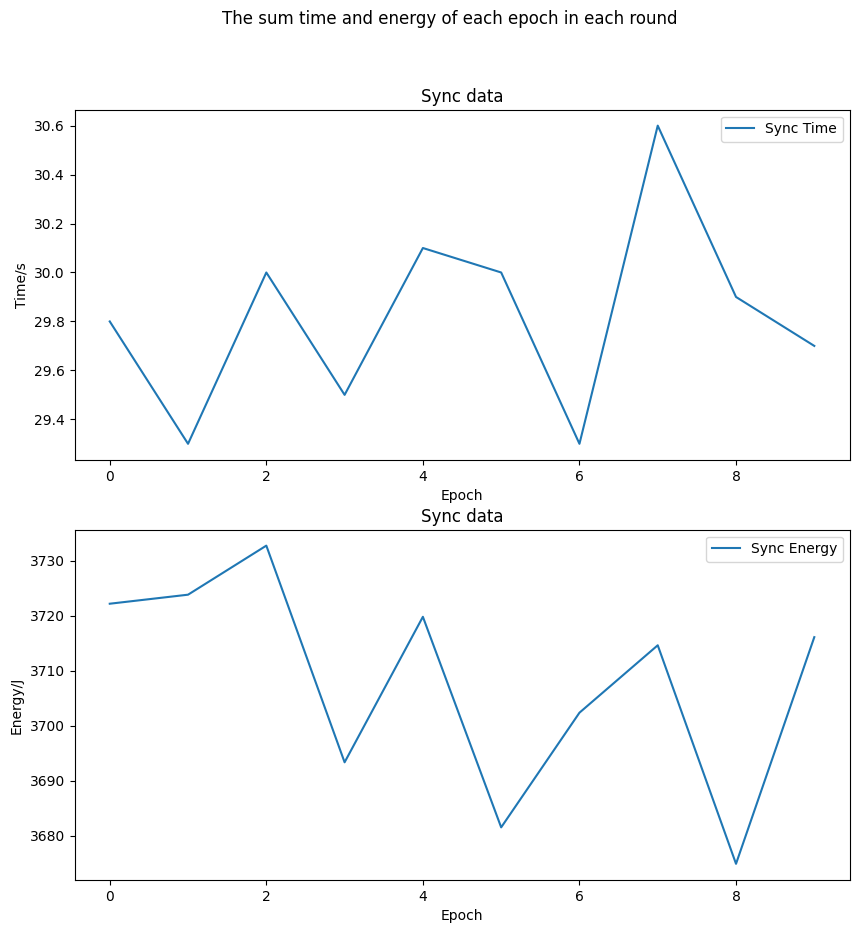

In [24]:
# plot the sum time of each epoch in sync and nosync in 1 fiugre with 2 subplots using line chart, the left axis is the time, the right axis is the energy
fig, axs = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle('The sum time and energy of each epoch in each round')
# sync data
axs[0].plot(np.arange(Epoch), EpochTime_syncavg.T, label='Sync Time')
axs[0].set_title('Sync data')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Time/s')
axs[0].legend() 
axs[1].plot(np.arange(Epoch), EnergyData_syncavg.T, label='Sync Energy')
axs[1].set_title('Sync data')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Energy/J')
axs[1].legend()

# # nosync data
# axs[0].plot(np.arange(Epoch), EpochTime_nosyncavg.T, label='NoSync Time')
# axs[0].set_title('NoSync data')
# axs[0].set_xlabel('Epoch')
# axs[0].set_ylabel('Time/s')
# axs[0].legend()
# axs[1].plot(np.arange(Epoch), EnergyData_nosyncavg.T, label='NoSync Energy')
# axs[1].set_title('NoSync data')
# axs[1].set_xlabel('Epoch')
# axs[1].set_ylabel('Energy/J')
# axs[1].legend()

plt.show()

#### EpochTime

In [25]:
# print(EpochTime_sync.shape, EpochTime_nosync.shape)

# calculate the avg time in sync data of each round
EpochTime_syncavg = np.average(EpochTime_sync, axis=0).T.reshape(-1,)
print('The avg time of each epoch in sync is: ', EpochTime_syncavg, '\n', 'The shape is: ', EpochTime_syncavg.shape)

# calculate the avg time in nosync data of each round
# EpochTime_nosyncavg = np.average(EpochTime_nosync, axis=0).T.reshape(-1,)
# print('The avg time of each epoch in sync is: ', EpochTime_nosyncavg, '\n', 'The shape is: ', EpochTime_nosyncavg.shape)

The avg time of each epoch in sync is:  [29.8 29.3 30.  29.5 30.1 30.  29.3 30.6 29.9 29.7] 
 The shape is:  (10,)


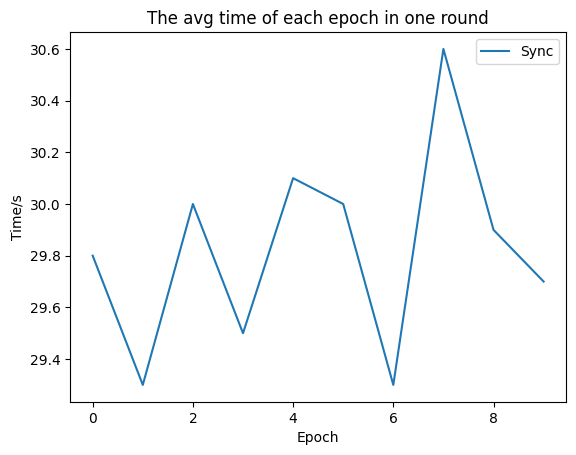

In [26]:
# plot the avg time of each epoch in sync and nosync in 1 fiugre using line chart
fig, ax = plt.subplots()
index = np.arange(Epoch)
plt.plot(index, EpochTime_syncavg, label='Sync')
# plt.plot(index, EpochTime_nosyncavg, label='NoSync')
plt.xlabel('Epoch')
plt.ylabel('Time/s')
plt.title('The avg time of each epoch in one round')
plt.legend()
plt.show()

#### TrainAcc, TrainLoss, TestAcc

In [26]:
print(TrainLoss_sync.shape, TrainAcc_sync.shape, TestAcc_sync.shape, TrainLoss_nosync.shape, TrainAcc_nosync.shape, TestAcc_nosync.shape)

(10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1) (10, 10, 1)


In [27]:
# calculate the avg value of the TrainLoss, TrainAcc, TestAcc in sync data in each round
# sync data
TrainLoss_syncavg = np.average(TrainLoss_sync, axis=1).T.reshape(-1,)
TrainAcc_syncavg = np.average(TrainAcc_sync, axis=1).T.reshape(-1,)
TestAcc_syncavg = np.average(TestAcc_sync, axis=1).T.reshape(-1,)
print('The avg TrainLoss of each epoch in sync is: ', TrainLoss_syncavg, '\n',
        'The avg TrainAcc of each epoch in sync is: ', TrainAcc_syncavg, '\n',
        'The avg TestAcc of each epoch in sync is: ', TestAcc_syncavg)

# nosync data
# TrainLoss_nosyncavg = np.average(TrainLoss_nosync, axis=1).T.reshape(-1,)
# TrainAcc_nosyncavg = np.average(TrainAcc_nosync, axis=1).T.reshape(-1,)
# TestAcc_nosyncavg = np.average(TestAcc_nosync, axis=1).T.reshape(-1,)
# print('The avg TrainLoss of each epoch in nosync is: ', TrainLoss_nosyncavg, '\n',
#         'The avg TrainAcc of each epoch in nosync is: ', TrainAcc_nosyncavg, '\n',
#         'The avg TestAcc of each epoch in nosync is: ', TestAcc_nosyncavg)

The avg TrainLoss of each epoch in sync is:  [3.99630842 3.98628774 3.99437252 4.02626637 4.04460301 4.06362217
 4.0314115  4.06018498 4.07799853 4.002912  ] 
 The avg TrainAcc of each epoch in sync is:  [0.093    0.093308 0.092344 0.087626 0.084744 0.082722 0.086464 0.081356
 0.079454 0.091126] 
 The avg TestAcc of each epoch in sync is:  [0.1206  0.12481 0.12103 0.11685 0.11203 0.11215 0.11147 0.10506 0.10589
 0.11617]


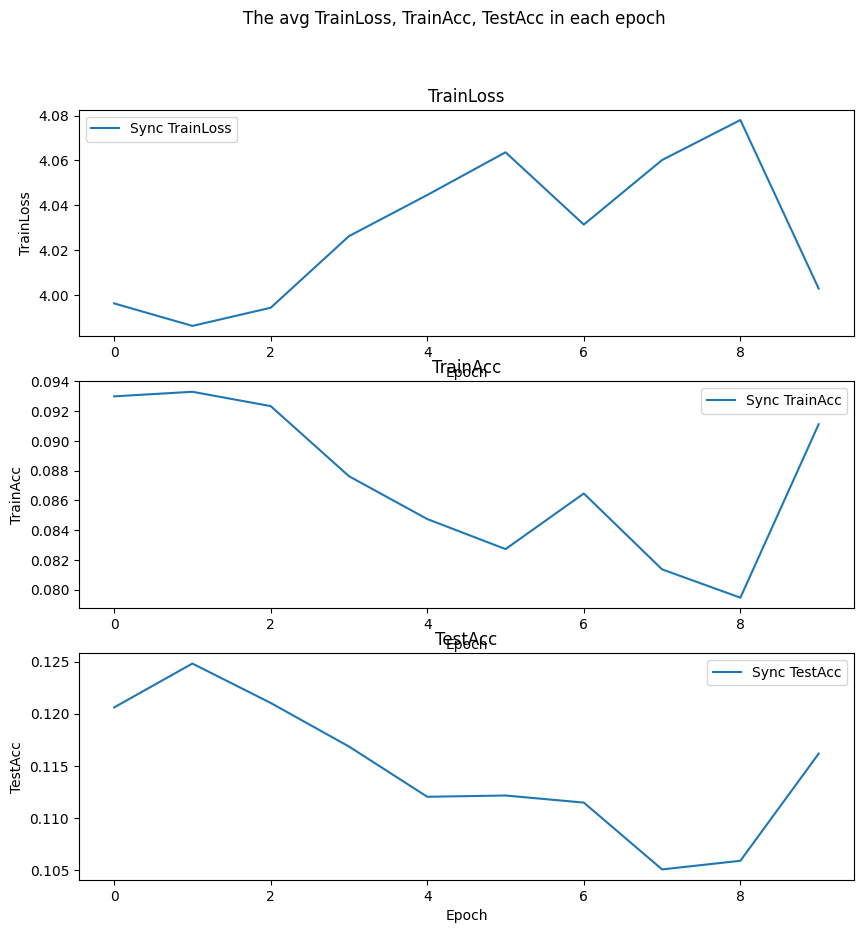

In [28]:
# plot the avg TrainLoss, TrainAcc, TestAcc in sync and nosync data in 1 figure using line chart, with 3 subplots, each subplots contains sync data and nosync data
fig, axs = plt.subplots(3, 1, figsize=(10,10))
fig.suptitle('The avg TrainLoss, TrainAcc, TestAcc in each epoch')
# TrainLoss
axs[0].plot(TrainLoss_syncavg, label='Sync TrainLoss')
# axs[0].plot(TrainLoss_nosyncavg, label='NoSync TrainLoss')
axs[0].set_title('TrainLoss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('TrainLoss')
axs[0].legend()

# TrainAcc
axs[1].plot(TrainAcc_syncavg, label='Sync TrainAcc')
# axs[1].plot(TrainAcc_nosyncavg, label='NoSync TrainAcc')
axs[1].set_title('TrainAcc')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('TrainAcc')
axs[1].legend()

# TestAcc
axs[2].plot(TestAcc_syncavg, label='Sync TestAcc')
# axs[2].plot(TestAcc_nosyncavg, label='NoSync TestAcc')
axs[2].set_title('TestAcc')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('TestAcc')
axs[2].legend()

plt.show()

#### combined analysis